In [1]:
# import installed libraries
from scipy.io import wavfile
from IPython.display import clear_output
from scipy.fftpack import fft, fftshift
import jams
import os
import matplotlib.pyplot as plt
import interpreter as itp
import numpy as np
import matplotlib.pyplot as plt

SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


In [4]:
# for excerpt in os.listdir('annotation'):
#     jam = jams.load(f'annotation/{excerpt}')
#     itp.jams_to_midi(jam,q=0).write(f'MIDIS_no_bend/{excerpt[:-5]}.mid')
jam = jams.load('annotation/00_SS3-84-Bb_comp.jams')
itp.jams_to_midi(jam,q=1).write('a.mid')

In [4]:
samplerate, data = wavfile.read('00_SS3-84-Bb_comp_mix.wav')

# define sound metadata
data_size = data.shape[0]
song_length_seconds = data_size/samplerate

# print sound metadata
print("Data size:", data_size)
print("Sample rate:", samplerate)
print("Song length (seconds):", song_length_seconds, "seconds")

Data size: 2015705
Sample rate: 44100
Song length (seconds): 45.70759637188208 seconds


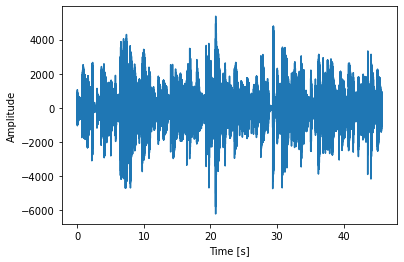

In [5]:
time_domain = np.linspace(0, song_length_seconds, data_size)

# plot sound wave
plt.plot(time_domain, data)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [6]:
a=jams.load('annotation/00_SS3-84-Bb_comp.jams')
times=[]
annos=a.search(namespace='note_midi')
for anno in annos:
    for note in anno:
        times.append(note.time)
times.sort()

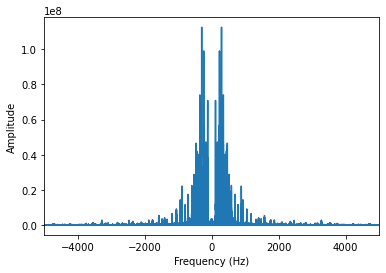

In [7]:
freq_domain = np.linspace(-samplerate/2,samplerate/2,data_size)

# fourier transform
fourier_data = abs(fft(data))
fourier_data_shift = fftshift(fourier_data)

# plotting spectral content of sound wave
plt.xlim([-5000, 5000])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.plot(freq_domain, fourier_data_shift)
plt.show()

In [9]:
len(times)

184

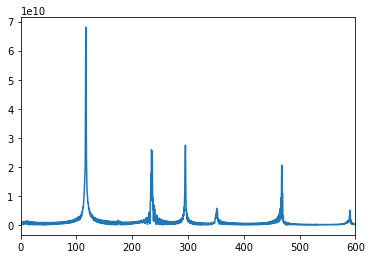

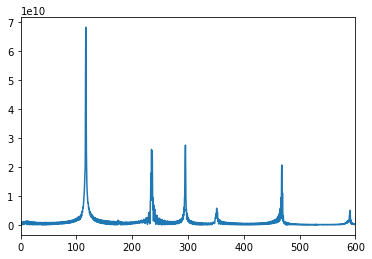

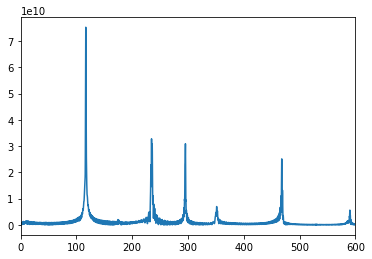

In [13]:
results = []

for i in times[:3]:
    plt.figure()
    plt.xlim([0, 600])
    gaussian = 11000*np.exp(-2*np.power(time_domain - i, 2))

    gaussian_filtered = data*gaussian

    fourier_data = abs(fft(gaussian_filtered))
    fourier_data_shift = fftshift(fourier_data)

    results.append(fourier_data_shift)
    plt.plot(freq_domain, fourier_data_shift)

In [21]:
time_domain-times[2]

array([-0.09187483, -0.09185215, -0.09182948, ..., 45.61567619,
       45.61569887, 45.61572154])

In [22]:
times=[]
annos=a.search(namespace='note_midi')
for anno in annos:
    for note in anno:
        print(note)

Observation(time=0.00786122448982951, duration=2.182675736961471, value=46.067550414766906, confidence=None)
Observation(time=8.588382766439906, duration=0.7546485260771192, value=50.01543846154736, confidence=None)
Observation(time=14.319697959183657, duration=3.5758730158730145, value=46.06574582006829, confidence=None)
Observation(time=22.871738775510153, duration=2.1942857142857406, value=46.05675888362205, confidence=None)
Observation(time=31.49230566893425, duration=0.853333333333353, value=49.91927923307911, confidence=None)
Observation(time=37.19695419501136, duration=2.4555102040816337, value=46.062840754795744, confidence=None)
Observation(time=1.4779292517006866, duration=0.9287981859410479, value=53.15243428344557, confidence=None)
Observation(time=2.9460925170067753, duration=1.9853061224490034, value=53.2714151470005, confidence=None)
Observation(time=5.735434920634873, duration=1.1784126984126715, value=55.05756725038108, confidence=None)
Observation(time=8.5725324263038